In [73]:
import pandas as pd
import re

In [74]:
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [4]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\18137\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [75]:
data=pd.read_csv("cleaned_dataset.csv")
data.head(5)

,Unnamed: 0,reviews
0,0,"['not', 'verified', 'we', 'will', 'never', 'fl..."
1,1,"['trip', 'verified', 'check', 'in', 'and', 'se..."
2,2,"['not', 'verified', 'british', 'airways', 'has..."
3,3,"['trip', 'verified', 'worst', 'ba', 'experienc..."
4,4,"['trip', 'verified', 'my', 'daughter', 'and', ..."


In [102]:

airline_positive_lexicon = ['excellent', 'amazing', 'great', 'wonderful', 'smooth', 'comfortable', 'helpful','hasslefree','quick','good','efficient','Outstanding','Delightful','Exceptional','Top-notch','Pleased']
airline_negative_lexicon = ['delay', 'worst','cancellation', 'rude', 'poor', 'uncomfortable', 'complaint', 'awful','indifferent','unresponsive','Frustration','Frustated','inconvenient','disappointing','terrible','problem','Lousy','displeased','annoying']

In [103]:
def calculate_sentiment_score(text):
    text = text.lower()
    positive_count = sum(1 for word in airline_positive_lexicon if word in text)
    negative_count = sum(1 for word in airline_negative_lexicon if word in text)
    sentiment_score = positive_count - negative_count
    return sentiment_score
data['Sentiment_Score'] = data['reviews'].apply(calculate_sentiment_score)

In [104]:
def categorize_sentiment(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

data['Sentiment'] = data['Sentiment_Score'].apply(categorize_sentiment)

In [105]:
data.to_csv("sentiment.csv")

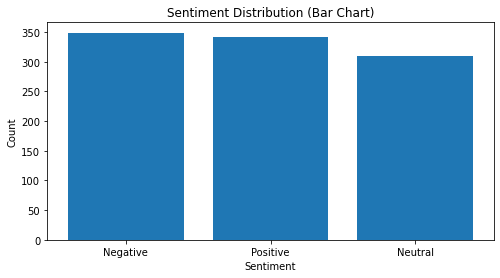

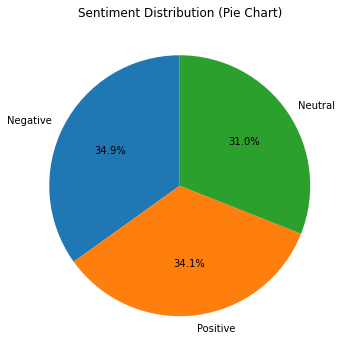

In [106]:
import matplotlib.pyplot as plt
sentiment_counts = data['Sentiment'].value_counts()

# Create a bar chart
plt.figure(figsize=(8, 4))
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution (Bar Chart)')
plt.show()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Sentiment Distribution (Pie Chart)')
plt.show()

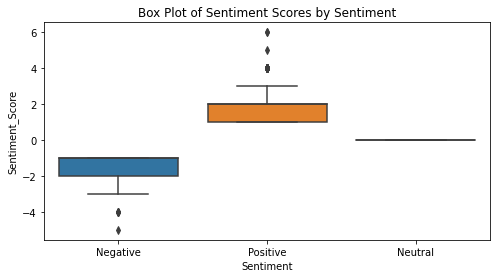

In [107]:
import seaborn as sns
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='Sentiment', y='Sentiment_Score')
plt.xlabel('Sentiment')
plt.ylabel('Sentiment_Score')
plt.title('Box Plot of Sentiment Scores by Sentiment')
plt.show()